In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gc
import datetime
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

# Reusable functions

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
folderPath = "D:\Competitions\CorporationGrocerySalesPrediction"

In [ ]:
fileName = "grosstrain.01.csv"
#fileName = "train.csv"
filePath = os.path.join(folderPath,fileName)
types = {
    'item_nbr':'int32',
    'store_nbr':'int16',
    'unit_sales':'float32'
}
data = pd.read_csv(filePath
                   ,index_col = ['item_nbr','store_nbr']
                   ,usecols=['date','store_nbr','item_nbr','unit_sales']
                   ,dtype=types
                   ,parse_dates=['date']
                   ,infer_datetime_format=True
                   ,low_memory=True
                  )
#data.head(3)

In [ ]:
data.info()

In [ ]:
del(data)

In [ ]:
#reading test file
fileName = "test.csv"
filePath = os.path.join(folderPath,fileName)
test = pd.read_csv(filePath,usecols=['id','store_nbr','item_nbr'],index_col=['item_nbr','store_nbr'])
test.head(10)

In [ ]:
del(test)

# Analysis

In [ ]:
data = data.groupby(['item_nbr','store_nbr']).agg({'unit_sales':'mean'})
data['unit_sales'] = round(data['unit_sales']).astype('int32')

In [ ]:
len(test)

In [ ]:
test.join(data,how='left').fillna(0).to_csv(os.path.join(folderPath,'submission1Test.csv')
                                            ,float_format="%.2f"
                                            ,index=None)

In [ ]:
gc.collect()

In [ ]:
#reading sample submission
fileName = "sample_submission.csv"
filePath = os.path.join(folderPath,fileName)
submission = pd.read_csv(filePath)
submission.head(10)

In [ ]:
del(submission)
gc.collect()

In [4]:
#reading items submission
fileName = "items.csv"
filePath = os.path.join(folderPath,fileName)
items = pd.read_csv(filePath)
items.head(10)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


In [ ]:
del(items)
gc.collect()

In [4]:
dateparser = lambda dates:pd.datetime.strptime(dates,'%Y-%m-%d')
#reading holiday events
fileName = "holidays_events.csv"
filePath = os.path.join(folderPath,fileName)
holidays = pd.read_csv(filePath)
holidays["date"] = holidays.date.apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))
holidays["transferred"] = holidays["transferred"].astype(np.bool)
holidays_events.head(1)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False


In [6]:
#reading stores
fileName = "stores.csv"
filePath = os.path.join(folderPath,fileName)
stores = pd.read_csv(filePath)
stores["store_nbr"] = stores["store_nbr"].astype(np.int8)
stores["type"] = stores["type"].astype("category")
stores["cluster"] = stores["cluster"].astype(np.int8)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13


In [7]:
#reading transactions submission
fileName = "transactions.csv"
filePath = os.path.join(folderPath,fileName)
trans = pd.read_csv(filePath,date_parser=dateparser,parse_dates=['date'])
trans["store_nbr"] = trans["store_nbr"].astype(np.int8)
trans["transactions"] = trans["transactions"].astype(np.int16)

,date,store_nbr,transactions
0,2013-01-01,25,770


In [ ]:
fileNameTemp = "grosstrain."
for i in range(1,21):
    print("{0}{1:02d}".format(fileNameTemp,i))

## Creating on subset

In [3]:
#fileName = "grosstrain.01.csv"
fileName = "train.csv"
filePath = os.path.join(folderPath,fileName)
types = {
    'item_nbr':'int64',
    'store_nbr':'int32',
    'unit_sales':'float64',
    'unit_sales':'object',
    'onpromotion':'object'
}
data = pd.read_csv(filePath
                   ,usecols=['store_nbr','date','item_nbr','unit_sales','onpromotion']
                   ,dtype=types
                  )

In [4]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
date           object
store_nbr      int32
item_nbr       int64
unit_sales     object
onpromotion    object
dtypes: int32(1), int64(1), object(3)
memory usage: 4.2+ GB


,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [ ]:
len(data[data["store_nbr"].between(1,5)])

In [ ]:
data[data["store_nbr"].between(1,4)].to_csv(os.path.join(folderPath,'trainstore1to4.csv')
                                            ,float_format="%.2f")

In [5]:
del(data)

In [6]:
gc.collect()

0

## Working for store 25

In [5]:
fileName = "trainstore25.csv"
filePath = os.path.join(folderPath,fileName)
types = {
    'id':'int32',
    'item_nbr':'int64',
    'store_nbr':'int64',
    'unit_sales':'float64'
}
data = pd.read_csv(filePath
                   ,usecols=['id','store_nbr','date','item_nbr','unit_sales','onpromotion']
                   ,dtype=types
                   ,parse_dates=['date'],
                   low_memory=False
                  )

In [6]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057020 entries, 0 to 2057019
Data columns (total 6 columns):
id             int32
date           datetime64[ns]
store_nbr      int64
item_nbr       int64
unit_sales     float64
onpromotion    object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 86.3+ MB


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


### Data Cleaning

In [7]:
data.drop("id",axis = 1,inplace=True)

In [8]:
data["onpromotion"].fillna(False,inplace=True)

In [9]:
data["onpromotion"] = data["onpromotion"].astype("bool")

In [12]:
onpromotion={True : 1,False: 0}
data["onpromotion"]=data["onpromotion"].map(onpromotion)
data["onpromotion"] = data["onpromotion"].astype(np.int8)

In [13]:
data.loc[(data.unit_sales<0),'unit_sales'] = 0 # eliminate negatives

In [ ]:
data['unit_sales'] =  data['unit_sales'].apply(pd.np.log1p) #logarithm conversion

In [14]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)
#data.set_index("id",inplace=True)
#data.sort_index(inplace=True)

In [15]:
data["store_nbr"] = data["store_nbr"].astype(np.int8)
data["item_nbr"] = data["item_nbr"].astype(np.int32)
data["unit_sales"] = data["unit_sales"].astype(np.int32)
data["onpromotion"] = data["onpromotion"].astype(np.bool)

In [16]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057020 entries, 0 to 2057019
Data columns (total 5 columns):
date           datetime64[ns]
store_nbr      int8
item_nbr       int32
unit_sales     int32
onpromotion    bool
dtypes: bool(1), datetime64[ns](1), int32(2), int8(1)
memory usage: 35.3 MB


,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,103665,7,False
1,2013-01-01,25,105574,1,False
2,2013-01-01,25,105575,2,False
3,2013-01-01,25,108079,1,False
4,2013-01-01,25,108701,1,False


## Mergin data

In [15]:
#picking holidays where day was off
holidays = holidays.loc[(holidays.type!='Event') & (holidays.type!='Work Day') & (holidays.transferred == False)]

In [16]:
trans=pd.merge(trans,stores,how='left')

In [17]:
trans['year'],trans['week'],trans['day'] = list(zip(*trans.date.apply(lambda x: x.isocalendar())))

In [18]:
trans['dayoff'] = [x in [6,7] for x in trans.day] #Converting weekends as holiday

In [19]:
for (d,l,ln) in zip(holidays["date"],holidays["locale"],holidays["locale_name"]):
    if l=='National':
        trans.loc[trans.date==d,'dayoff']=True
    elif l=='Regional':
        trans.loc[(trans.date==d)&(trans.state==ln),'dayoff']=True
    else:
        trans.loc[(trans.date==d)&(trans.city==ln),'dayoff']=True

In [20]:
trans.head(3)

,date,store_nbr,transactions,city,state,type,cluster,year,week,day,dayoff
0,2013-01-01,25,770,Salinas,Santa Elena,D,1,2013,1,2,True
1,2013-01-02,1,2111,Quito,Pichincha,D,13,2013,1,3,False
2,2013-01-02,2,2358,Quito,Pichincha,D,13,2013,1,3,False


## Developing features

In [17]:
data["Year"] = pd.DatetimeIndex(data["date"]).year
data["Year"] = data['Year'].astype(np.int32)

In [18]:
data['Month'] = pd.DatetimeIndex(data['date']).month.astype(np.int8)
data['Month'] = data['Month'].astype(np.int8)

In [19]:
data['Day'] =pd.DatetimeIndex(data['date']).day
data['Day'] = data['Day'].astype(np.uint8)

In [20]:
data['DOW'] = pd.DatetimeIndex(data['date']).dayofweek
data['DOW'] = data['DOW'].astype(np.uint8)

In [21]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057020 entries, 0 to 2057019
Data columns (total 9 columns):
date           datetime64[ns]
store_nbr      int8
item_nbr       int32
unit_sales     int32
onpromotion    bool
Year           int32
Month          int8
Day            uint8
DOW            uint8
dtypes: bool(1), datetime64[ns](1), int32(3), int8(2), uint8(2)
memory usage: 49.0 MB


,date,store_nbr,item_nbr,unit_sales,onpromotion,Year,Month,Day,DOW
0,2013-01-01,25,103665,7,False,2013,1,1,1
1,2013-01-01,25,105574,1,False,2013,1,1,1
2,2013-01-01,25,105575,2,False,2013,1,1,1
3,2013-01-01,25,108079,1,False,2013,1,1,1
4,2013-01-01,25,108701,1,False,2013,1,1,1


### Creating Train and test Set

In [22]:
train,test = data[data['date']<'2017-01-01'],data[data['date']>='2017-01-01']

In [23]:
features = ['item_nbr','onpromotion','Year','Month','Day','DOW']

#### Using Mean

In [ ]:
trainingmatrix = train.groupby(['item_nbr','onpromotion']).agg({'unit_sales':'mean'})

In [ ]:
test = test.join(trainingmatrix,how='left',on=['item_nbr','onpromotion'],rsuffix='_pred')

In [ ]:
test['unit_sales_pred'].fillna(0,inplace=True)

#### Using Linear model Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [ ]:
print('Training with features' + str(features))
# Train the model using the training sets
regr.fit(train[features], train['unit_sales'])

In [ ]:
regr.coef_

In [ ]:
test['unit_sales_pred'] = regr.predict(test[features])

#### Using Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=6, activation='relu'))
model.add(Dense(1,))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(train[features].values, train['unit_sales'].values,
          batch_size=10,epochs=2,verbose=1,
          validation_data=(test[features].values, test['unit_sales'].values))

In [ ]:
testPredict = model.predict(test[features].values)
test['unit_sales_pred'] = testPredict

## Using XGBoost

In [26]:
import xgboost as xgb

ImportError: No module named 'xgboost'

In [24]:
params = {"objective": "reg:linear",
          "eta": 0.3,
          "max_depth": 8,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "silent": 1
          }
num_trees = 300

In [25]:
print("Train a XGBoost model")
val_size = 100000

dtrain = xgb.DMatrix(train[features], np.log(train["unit_sales"] + 1))
dvalid = xgb.DMatrix(test[features], np.log(test["unit_sales"] + 1))
dtest = xgb.DMatrix(test[features])
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
gbm = xgb.train(params, dtrain, num_trees, evals=watchlist, early_stopping_rounds=50, feval=rmspe_xg, verbose_eval=True)

Train a XGBoost model


NameError: name 'xgb' is not defined

In [ ]:
print("Validating")
train_probs = gbm.predict(xgb.DMatrix(test[features]))


In [ ]:
indices = train_probs < 0
train_probs[indices] = 0
error = rmspe(np.exp(train_probs) - 1, test['unit_sales'].values)
print('error', error)

print("Make predictions on the test set")
test_probs = gbm.predict(xgb.DMatrix(test[features]))
indices = test_probs < 0
test_probs[indices] = 0

## Time Series Analysis

In [34]:
# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

In [32]:
def test_stationarity(timeseries):
    #perform dickey fuller test
    print('Results of Dickey Fuller test')
    dftest = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

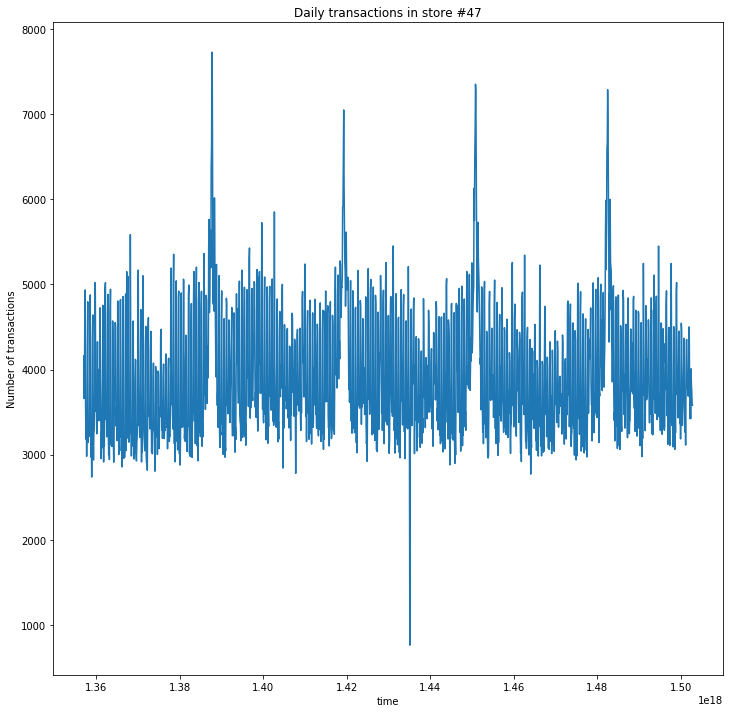

In [27]:
ts = trans.loc[trans['store_nbr']==47,['date','transactions']].set_index('date')
ts = ts.transactions.astype('float')
plt.figure(figsize=(12,12))
plt.title('Daily transactions in store #47')
plt.xlabel('time')
plt.ylabel('Number of transactions')
plt.plot(ts)

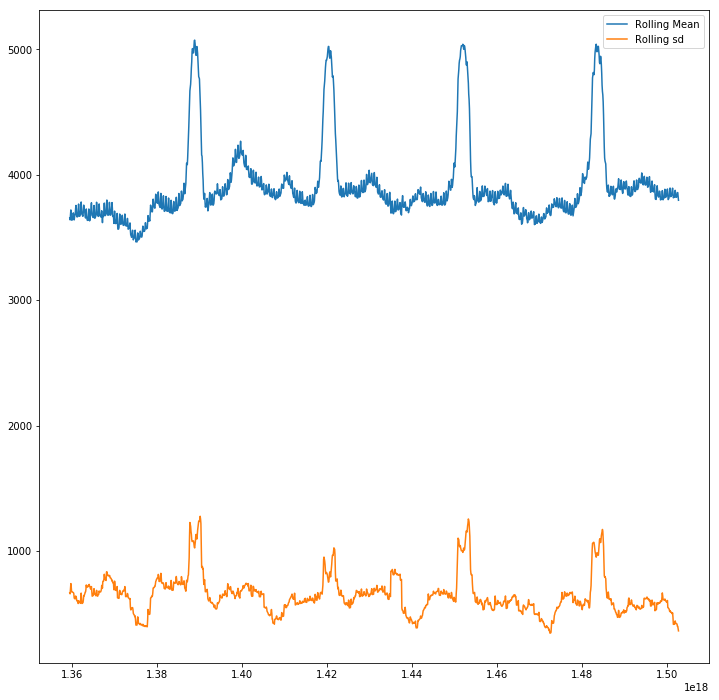

In [30]:
plt.figure(figsize=(12,12))
plt.plot(ts.rolling(window=30,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=30,center=False).std(),label='Rolling sd');
plt.legend();

In [33]:
test_stationarity(ts)

Results of Dickey Fuller test
Test Statistic                -7.069388e+00
p-value                        4.982766e-10
#Lags Used                     2.200000e+01
Number of Observations used    1.654000e+03
Critical Value (10%)          -2.567701e+00
Critical Value (5%)           -2.863289e+00
Critical Value (1%)           -3.434310e+00
dtype: float64


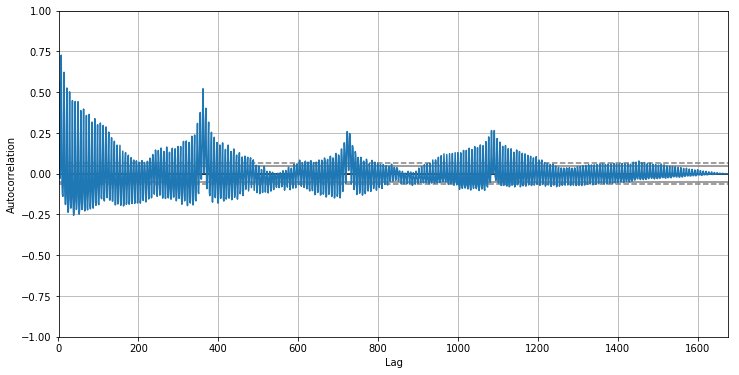

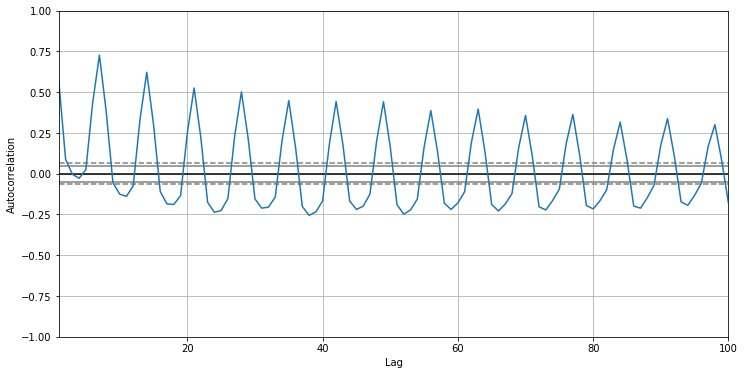

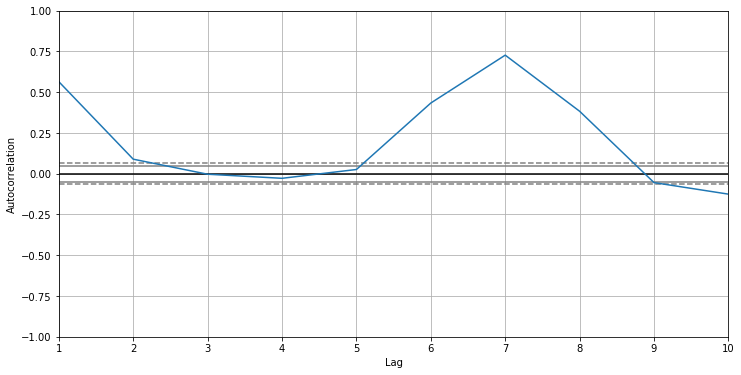

In [35]:
plt.figure(figsize=(12,6))
autocorrelation_plot(ts);
plt.figure(figsize=(12,6))
autocorrelation_plot(ts);
plt.xlim(xmax=100);
plt.figure(figsize=(12,6))
autocorrelation_plot(ts);
plt.xlim(xmax=10);

In [38]:
result = arma_order_select_ic(ts,max_ar=10,max_ma=10)
print('The bic prescribes these (p,q) parameters : {}'.format(result.bic_min_order))
print('The aic prescribes these (p,q) parameters : {}'.format(result.aic_min_order))


C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: Con

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:496: Con

The bic prescribes these (p,q) parameters : (5, 5)


AttributeError: 'Bunch' object has no attribute 'aic_min_order'

In [39]:
result

{'bic':               0             1             2             3             4   \
 0   26824.665461  25961.893102  25897.304323  25891.272808  25898.081362   
 1   26189.507994  25913.018509  25893.036376  25898.496629  25818.100273   
 2   25995.631481  25910.834558  25894.743812  25553.303679  25559.229856   
 3   25936.178633  25871.437611  25630.559616  25558.891685  25415.172307   
 4   25899.518497  25898.322954  25369.304669  25376.289193  25210.081200   
 5   25842.690283  25562.358173  24980.158180  24963.368686  24637.983720   
 6   25170.859828  25107.563377  24864.653702  24867.360100  24594.424421   
 7   25011.003042  24942.027476  24777.553702  24779.574310  24594.660186   
 8   24816.101322  24764.210190  24756.055530  24763.479467  24601.637780   
 9   24740.279028  24744.443859  24751.045667  24751.535318  24606.128704   
 10  24745.614047  24751.500675  24758.329871  24704.155303  24610.394377   
 
               5             6             7             8         

## Evaluation

In [ ]:
test['unit_sales_pred'].fillna(0,inplace=True)


In [ ]:
print("Mean squared error: %.2f"
      % mean_squared_error(test["unit_sales"],test['unit_sales_pred']))
print("R2 square: %.2f"
     % r2_score(test["unit_sales"],test['unit_sales_pred']))

In [ ]:
#test['unit_sales_pred'] =  test['unit_sales_pred'].apply(pd.np.expm1)

In [ ]:
# Plot outputs
plt.scatter(test['unit_sales'], test['unit_sales_pred'],  color='black')
#plt.plot(test['unit_sales'], test['unit_sales_pred'], color='blue', linewidth=3)

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot( x='Year', y='unit_sales', ax=axs[0], figsize=(16, 8))
data.plot(x='Month', y='unit_sales', ax=axs[1])
data.plot(x='Day', y='unit_sales', ax=axs[2])

In [3]:
def NWRMSLE(y, pred, weights):
    assert pred.isnull().sum() == 0, "nan!"
    y = np.array(y).clip(0,np.max(y))
    pred = np.array(pred).clip(0,np.max(pred))
    weighted_errors = weights * np.square(np.log1p(pred) - np.log1p(y))
    return math.sqrt(np.sum(weighted_errors)/np.sum(weights))

#pass weights (as 1+y['perishable']*0.25)